In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Cargar el conjunto de datos
ruta_archivo = 'data_evaluacion.csv'
data = pd.read_csv(ruta_archivo)


In [65]:
# Renombrar columnas para facilitar el acceso
data.columns = ['edad', 'sector_trabajo', 'fnlwgt', 'educacion', 'num_educacion', 'estado_civil',
                'ocupacion', 'relacion', 'raza', 'sexo', 'ganancia_capital', 'perdida_capital',
                'horas_por_semana', 'pais_nativo', 'ingreso']

In [66]:
# Codificar variables categóricas
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [67]:
# Dividir los datos en características y variable objetivo
X = data.drop('ingreso', axis=1)
y = data['ingreso']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
# Inicializar y entrenar el clasificador de árboles de decisión
clf = DecisionTreeClassifier(max_depth=5,random_state=42)
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)
# Para el conjunto de prueba
y_train_pred = clf.predict(X_train)

In [69]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

In [70]:
# Crear un DataFrame para el informe de clasificación
report_df = pd.DataFrame(report).transpose()

# Crear un DataFrame para la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=["<=50K", ">50K"], columns=["<=50K", ">50K"])

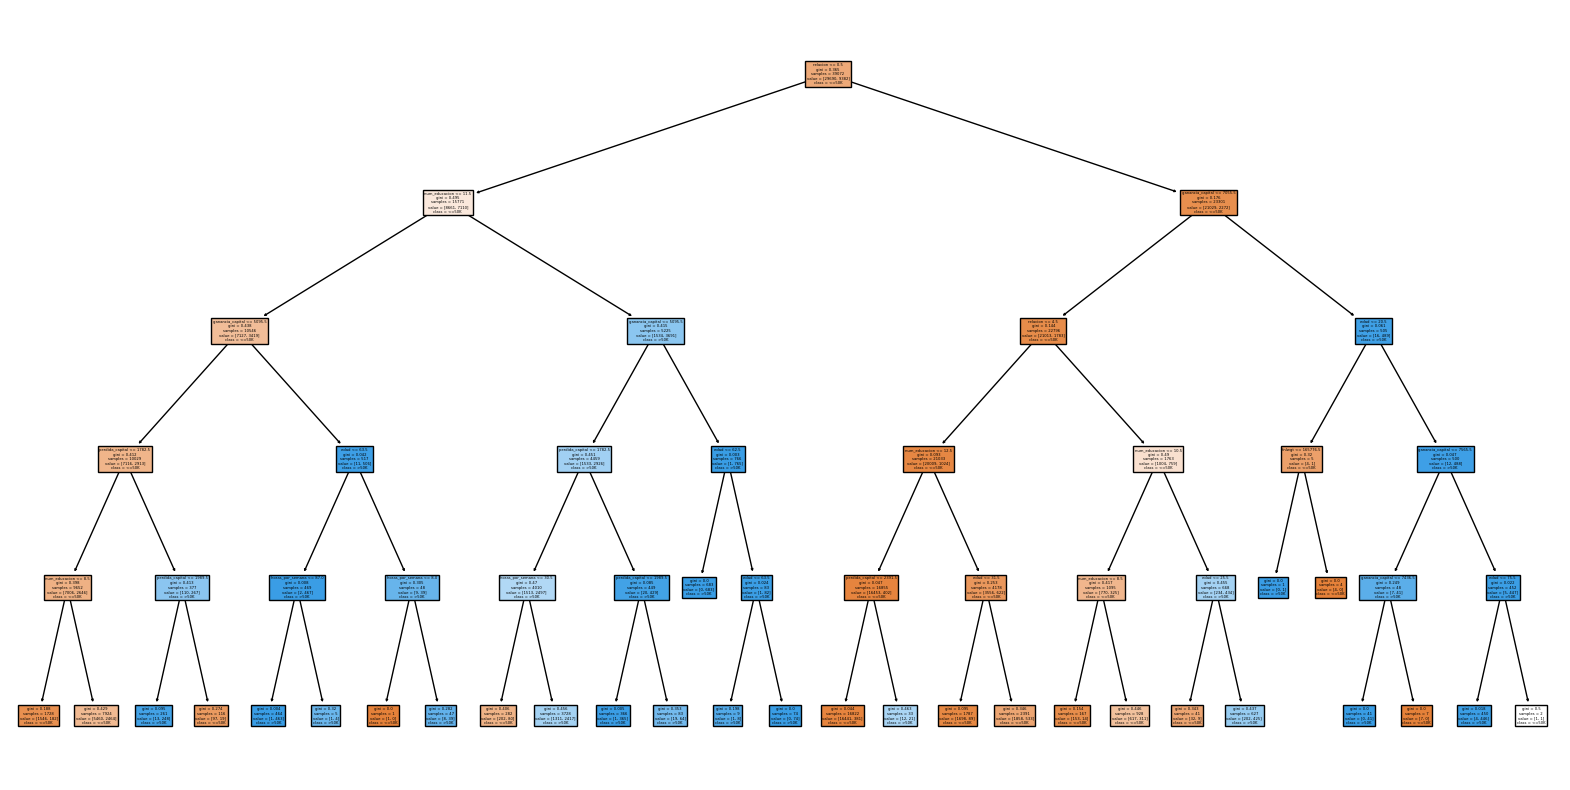

In [71]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['<=50K', '>50K'], filled=True)
plt.show()


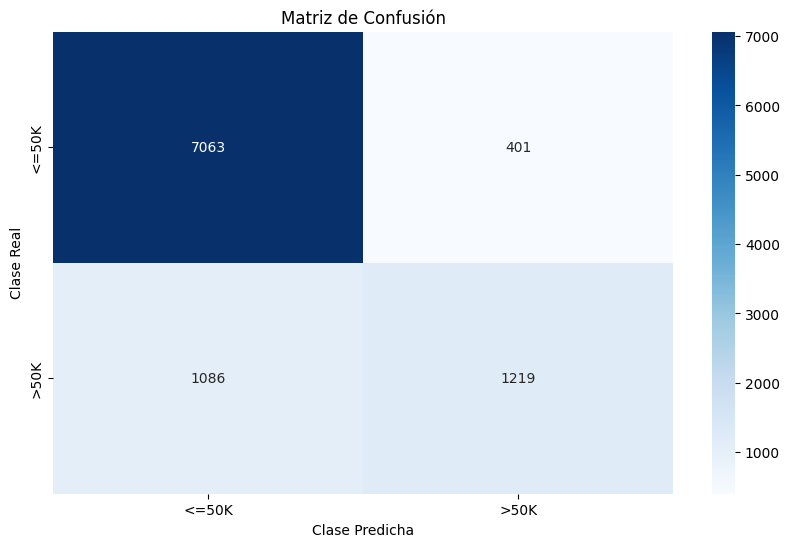

Train Accuracy: 0.8552416052416052
Test Accuracy: 0.8477838059166752
              precision    recall  f1-score      support
0              0.866732  0.946275  0.904759  7464.000000
1              0.752469  0.528850  0.621146  2305.000000
accuracy       0.847784  0.847784  0.847784     0.847784
macro avg      0.809601  0.737563  0.762953  9769.000000
weighted avg   0.839772  0.847784  0.837840  9769.000000


In [72]:
# Graficar la matriz de confusión
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.ylabel("Clase Real")
plt.xlabel("Clase Predicha")
plt.show()
#Acurracy
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
# Mostrar el informe de clasificación
print(report_df)

## Conclusiones
La matriz de confusión muestra que el modelo tiene dificultades para predecir correctamente la clase '>50K', con un número significativo de falsos negativos.  

La clase 0 que corresponde a '<=50' tiene una mejor precisión, recall y f1 a comparación de la clase 1 (>50K), esto indica que el modelo predice de mejor forma la clase de <=50.

Tambíen vemos que el modelo aprende bien porque no hay una diferencia significativa entre el train y test.